## Importing the Data

In [5]:
# Read in the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_spectra = pd.read_csv('data/spectra.csv', header=None)
df_bts = pd.read_csv('data/BTS.csv')
df_bts.head()

,ZTFID,IAUID,RA,Dec,peakt,peakfilt,peakmag,peakabs,duration,rise,fade,type,redshift,b,A_V
0,ZTF17aaaeqms,AT2023jkf,01:19:13.43,+31:46:26.1,2102.97,r,17.5839,-,18.001,12.004,5.997,-,-,-30.726791,0.205
1,ZTF17aaajowi,-,11:47:44.37,+14:34:10.4,1362.73,r,18.9963,-,>5.611,2.651,>2.96,-,-,70.564727,0.127
2,ZTF17aaanztg,AT2021abaw,10:04:06.59,-01:12:18.6,1501.02,r,18.3035,-,>14.737,>3,11.737,-,-,40.798120,0.210
3,ZTF17aaaocnx,AT2019dlf,06:12:54.20,+48:49:57.0,584.70,g,17.2290,-,6.213,0.803,5.41,-,-,14.194943,0.407
4,ZTF17aaaptxx,AT2023gdf,11:54:24.96,+09:36:32.8,2053.73,g,18.9437,-,>2,>2,>0,-,-,67.910221,0.079


## Data Cleaning

In [6]:
# Transpose data so SuperNova are rows
df_spectra = df_spectra.transpose()
df_spectra.iloc[0,0] = 'ZTFID'

df_spectra.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,ZTFID,errors,followup_request_id,created_at,units,assignment_id,modified,obj_id,altdata,observed_at,...,groups,pis,reducers,observers,observed_at_mjd,owner,obj_internal_key,external_reducer,external_observer,external_pi
1,ZTF22abfpgcn,"[3.819e-34, 3.201e-34, 1.493e-34, 9.351e-32, 7...",16946,2022-09-07T11:16:53.599008,NaN,NaN,2022-09-07T11:16:53.599008,ZTF22abfpgcn,"{'JD': 2459829.9428332, 'RA': 19600.12, 'ADC':...",2022-09-07T10:37:40,...,"[{'id': 12, 'created_at': '2020-10-21T06:20:33...",[],[],[],59829.442824074074,"{'username': 'sedm-robot', 'first_name': 'SEDm...",36b81dbf-18f6-49be-be2e-cdb713badbb5,NaN,NaN,NaN
2,ZTF21aaqyetj,NaN,2865,2021-04-20T05:24:50.434325,NaN,NaN,2021-04-20T05:24:50.434325,ZTF21aaqyetj,"{'JD': 2459324.6918952, 'RA': 33918.65, 'ADC':...",2021-04-20T04:36:18,...,"[{'id': 12, 'created_at': '2020-10-21T06:20:33...",[],[],[],59324.191875,"{'username': 'sedm-robot', 'first_name': 'SEDm...",58a402af-3650-4992-a84f-cb0f1d80abf6,NaN,NaN,NaN
3,ZTF21aaygqkb,NaN,3374,2021-05-28T11:21:00.460649,NaN,NaN,2021-05-28T11:21:00.460649,ZTF21aaygqkb,"{'JD': 2459362.9333179, 'RA': 85936.18, 'ADC':...",2021-05-28T10:23:58,...,"[{'id': 12, 'created_at': '2020-10-21T06:20:33...",[],[],[],59362.43331018519,"{'username': 'sedm-robot', 'first_name': 'SEDm...",29999d1d-f375-4933-809d-60350093e46f,NaN,NaN,NaN
4,ZTF21aanwbhk,NaN,2348,2021-03-17T14:03:56.951777,NaN,NaN,2021-03-17T14:03:56.951777,ZTF21aanwbhk,"{'JD': 2459290.7206854, 'RA': 42818.77, 'ADC':...",2021-03-17T05:17:46,...,"[{'id': 12, 'created_at': '2020-10-21T06:20:33...",[],[],[],59290.220671296294,"{'username': 'sedm-robot', 'first_name': 'SEDm...",dd9f2a27-e39b-45fc-ad24-9bdcfccd4670,NaN,NaN,NaN


In [7]:
# Change first row to column headers
df_spectra.columns = df_spectra.iloc[0]

# Drop the first row (which is now redundant)
df_spectra = df_spectra.drop(0)
df_spectra.head()

,ZTFID,errors,followup_request_id,created_at,units,assignment_id,modified,obj_id,altdata,observed_at,...,groups,pis,reducers,observers,observed_at_mjd,owner,obj_internal_key,external_reducer,external_observer,external_pi
1,ZTF22abfpgcn,"[3.819e-34, 3.201e-34, 1.493e-34, 9.351e-32, 7...",16946,2022-09-07T11:16:53.599008,NaN,NaN,2022-09-07T11:16:53.599008,ZTF22abfpgcn,"{'JD': 2459829.9428332, 'RA': 19600.12, 'ADC':...",2022-09-07T10:37:40,...,"[{'id': 12, 'created_at': '2020-10-21T06:20:33...",[],[],[],59829.442824074074,"{'username': 'sedm-robot', 'first_name': 'SEDm...",36b81dbf-18f6-49be-be2e-cdb713badbb5,NaN,NaN,NaN
2,ZTF21aaqyetj,NaN,2865,2021-04-20T05:24:50.434325,NaN,NaN,2021-04-20T05:24:50.434325,ZTF21aaqyetj,"{'JD': 2459324.6918952, 'RA': 33918.65, 'ADC':...",2021-04-20T04:36:18,...,"[{'id': 12, 'created_at': '2020-10-21T06:20:33...",[],[],[],59324.191875,"{'username': 'sedm-robot', 'first_name': 'SEDm...",58a402af-3650-4992-a84f-cb0f1d80abf6,NaN,NaN,NaN
3,ZTF21aaygqkb,NaN,3374,2021-05-28T11:21:00.460649,NaN,NaN,2021-05-28T11:21:00.460649,ZTF21aaygqkb,"{'JD': 2459362.9333179, 'RA': 85936.18, 'ADC':...",2021-05-28T10:23:58,...,"[{'id': 12, 'created_at': '2020-10-21T06:20:33...",[],[],[],59362.43331018519,"{'username': 'sedm-robot', 'first_name': 'SEDm...",29999d1d-f375-4933-809d-60350093e46f,NaN,NaN,NaN
4,ZTF21aanwbhk,NaN,2348,2021-03-17T14:03:56.951777,NaN,NaN,2021-03-17T14:03:56.951777,ZTF21aanwbhk,"{'JD': 2459290.7206854, 'RA': 42818.77, 'ADC':...",2021-03-17T05:17:46,...,"[{'id': 12, 'created_at': '2020-10-21T06:20:33...",[],[],[],59290.220671296294,"{'username': 'sedm-robot', 'first_name': 'SEDm...",dd9f2a27-e39b-45fc-ad24-9bdcfccd4670,NaN,NaN,NaN
5,ZTF24aaajtzg,"[8.443e-35, 1.215e-32, 1.069e-32, 9.623e-33, 8...",29046,2024-01-13T09:53:13.369385,NaN,NaN,2024-01-13T09:53:13.369385,ZTF24aaajtzg,"{'JD': 2460322.8743916, 'RA': 28359.83, 'ADC':...",2024-01-13T08:59:07,...,"[{'id': 280, 'created_at': '2021-04-20T17:55:4...",[],[],[],60322.374386574076,"{'username': 'sedm-robot', 'first_name': 'SEDm...",cb891f88-0701-42d8-b583-6c24255a9774,NaN,NaN,NaN


In [8]:
df_spectra.columns

Index(['ZTFID', 'errors', 'followup_request_id', 'created_at', 'units',
       'assignment_id', 'modified', 'obj_id', 'altdata', 'observed_at',
       'original_file_string', 'origin', 'original_file_filename', 'type',
       'owner_id', 'fluxes', 'label', 'id', 'wavelengths', 'instrument_id',
       'comments', 'annotations', 'instrument_name', 'telescope_id',
       'telescope_name', 'groups', 'pis', 'reducers', 'observers',
       'observed_at_mjd', 'owner', 'obj_internal_key', 'external_reducer',
       'external_observer', 'external_pi'],
      dtype='object', name=0)

In [9]:
df_spectra

,ZTFID,errors,followup_request_id,created_at,units,assignment_id,modified,obj_id,altdata,observed_at,...,groups,pis,reducers,observers,observed_at_mjd,owner,obj_internal_key,external_reducer,external_observer,external_pi
1,ZTF22abfpgcn,"[3.819e-34, 3.201e-34, 1.493e-34, 9.351e-32, 7...",16946,2022-09-07T11:16:53.599008,NaN,NaN,2022-09-07T11:16:53.599008,ZTF22abfpgcn,"{'JD': 2459829.9428332, 'RA': 19600.12, 'ADC':...",2022-09-07T10:37:40,...,"[{'id': 12, 'created_at': '2020-10-21T06:20:33...",[],[],[],59829.442824074074,"{'username': 'sedm-robot', 'first_name': 'SEDm...",36b81dbf-18f6-49be-be2e-cdb713badbb5,NaN,NaN,NaN
2,ZTF21aaqyetj,NaN,2865,2021-04-20T05:24:50.434325,NaN,NaN,2021-04-20T05:24:50.434325,ZTF21aaqyetj,"{'JD': 2459324.6918952, 'RA': 33918.65, 'ADC':...",2021-04-20T04:36:18,...,"[{'id': 12, 'created_at': '2020-10-21T06:20:33...",[],[],[],59324.191875,"{'username': 'sedm-robot', 'first_name': 'SEDm...",58a402af-3650-4992-a84f-cb0f1d80abf6,NaN,NaN,NaN
3,ZTF21aaygqkb,NaN,3374,2021-05-28T11:21:00.460649,NaN,NaN,2021-05-28T11:21:00.460649,ZTF21aaygqkb,"{'JD': 2459362.9333179, 'RA': 85936.18, 'ADC':...",2021-05-28T10:23:58,...,"[{'id': 12, 'created_at': '2020-10-21T06:20:33...",[],[],[],59362.43331018519,"{'username': 'sedm-robot', 'first_name': 'SEDm...",29999d1d-f375-4933-809d-60350093e46f,NaN,NaN,NaN
4,ZTF21aanwbhk,NaN,2348,2021-03-17T14:03:56.951777,NaN,NaN,2021-03-17T14:03:56.951777,ZTF21aanwbhk,"{'JD': 2459290.7206854, 'RA': 42818.77, 'ADC':...",2021-03-17T05:17:46,...,"[{'id': 12, 'created_at': '2020-10-21T06:20:33...",[],[],[],59290.220671296294,"{'username': 'sedm-robot', 'first_name': 'SEDm...",dd9f2a27-e39b-45fc-ad24-9bdcfccd4670,NaN,NaN,NaN
5,ZTF24aaajtzg,"[8.443e-35, 1.215e-32, 1.069e-32, 9.623e-33, 8...",29046,2024-01-13T09:53:13.369385,NaN,NaN,2024-01-13T09:53:13.369385,ZTF24aaajtzg,"{'JD': 2460322.8743916, 'RA': 28359.83, 'ADC':...",2024-01-13T08:59:07,...,"[{'id': 280, 'created_at': '2021-04-20T17:55:4...",[],[],[],60322.374386574076,"{'username': 'sedm-robot', 'first_name': 'SEDm...",cb891f88-0701-42d8-b583-6c24255a9774,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5473,ZTF21achxlkq,"[1.531e-32, 1.227e-32, 9.205e-33, 6.487e-33, 6...",5261,2021-10-17T08:49:18.022322,NaN,NaN,2021-10-17T08:49:18.022322,ZTF21achxlkq,"{'JD': 2459504.8285633, 'RA': 23138.41, 'ADC':...",2021-10-17T07:53:07,...,"[{'id': 12, 'created_at': '2020-10-21T06:20:33...",[],[],[],59504.32855324074,"{'username': 'sedm-robot', 'first_name': 'SEDm...",7958bac9-0499-47e0-81f8-946e1b666e9d,NaN,NaN,NaN
5474,ZTF23aavdzpd,"[3.348e-32, 3.456e-32, 3.633e-32, 2.859e-32, 1...",24558,2023-08-05T10:09:30.207475,NaN,NaN,2023-08-05T10:09:30.207475,ZTF23aavdzpd,"{'JD': 2460161.8908194, 'RA': 5977.1, 'ADC': '...",2023-08-05T09:22:46,...,"[{'id': 12, 'created_at': '2020-10-21T06:20:33...",[],[],[],60161.390810185185,"{'username': 'sedm-robot', 'first_name': 'SEDm...",d2d9458d-bf27-43a3-a603-6ea158a51b68,NaN,NaN,NaN
5475,ZTF23abilcsx,"[2.733e-32, 2.166e-32, 1.951e-32, 1.163e-32, 1...",26162,2023-10-09T05:16:47.083407,NaN,NaN,2023-10-09T05:16:47.083407,ZTF23abilcsx,"{'JD': 2460226.68778, 'RA': 79178.87, 'ADC': '...",2023-10-09T04:30:24,...,"[{'id': 12, 'created_at': '2020-10-21T06:20:33...",[],[],[],60226.18777777778,"{'username': 'sedm-robot', 'first_name': 'SEDm...",90295458-df33-47a5-9ba2-92c1fba4830e,NaN,NaN,NaN
5476,ZTF24aaarmzn,"[5.491e-32, 1.07e-31, 3.576e-32, 3.993e-32, 2....",29193,2024-01-17T18:47:25.453549,NaN,NaN,2024-01-17T18:47:25.453549,ZTF24aaarmzn,"{'JD': 2460326.8755597, 'RA': 44990.58, 'ADC':...",2024-01-17T09:00:48,...,"[{'id': 280, 'created_at': '2021-04-20T17:55:4...",[],[],[],60326.375555555554,"{'username': 'sedm-robot', 'first_name': 'SEDm...",1bc947b4-1ce4-49b1-b3e4-aee96c355aa1,NaN,NaN,NaN


In [10]:
# Looking at value_counts for SN types before merge
df_bts['type'].value_counts()

type
SN Ia            6029
-                5343
SN II            1267
SN IIn            238
SN Ia-91T         205
SN Ic             164
SN Ib             154
SN IIb            116
SN IIP            114
SLSN-I             69
SN Ic-BL           66
SN Ia-91bg         52
TDE                50
nova               47
SN Ia-pec          41
SLSN-II            39
SN Ib/c            34
SN Ibn             31
SN Iax             19
SN Ia-CSM          19
SN II-pec           9
LBV                 6
SN Ia-SC            6
Other               6
SN Ib-pec           5
SN Icn              5
LRN                 4
ILRT                4
Ca-rich             3
other               2
SN IIL              2
SN Ca-rich-Ca       2
SN IIn-pec          1
SN Ic-pec           1
Name: count, dtype: int64

In [11]:
df_bts.head()

,ZTFID,IAUID,RA,Dec,peakt,peakfilt,peakmag,peakabs,duration,rise,fade,type,redshift,b,A_V
0,ZTF17aaaeqms,AT2023jkf,01:19:13.43,+31:46:26.1,2102.97,r,17.5839,-,18.001,12.004,5.997,-,-,-30.726791,0.205
1,ZTF17aaajowi,-,11:47:44.37,+14:34:10.4,1362.73,r,18.9963,-,>5.611,2.651,>2.96,-,-,70.564727,0.127
2,ZTF17aaanztg,AT2021abaw,10:04:06.59,-01:12:18.6,1501.02,r,18.3035,-,>14.737,>3,11.737,-,-,40.798120,0.210
3,ZTF17aaaocnx,AT2019dlf,06:12:54.20,+48:49:57.0,584.70,g,17.2290,-,6.213,0.803,5.41,-,-,14.194943,0.407
4,ZTF17aaaptxx,AT2023gdf,11:54:24.96,+09:36:32.8,2053.73,g,18.9437,-,>2,>2,>0,-,-,67.910221,0.079


In [12]:
# Merge spectra and bts dataset
df_merged = df_bts.merge(df_spectra, on='ZTFID')
df_merged.columns

# 'type_x' is the label

# Looking at value_counts for SN types after merge
df_merged['type_x'].value_counts()

type_x
SN Ia            2938
-                1147
SN II             646
SN IIn            121
SN Ib              81
SN Ic              80
SN Ia-91T          70
SN IIb             67
SN IIP             46
SLSN-I             36
SN Ic-BL           35
TDE                34
SN Ia-91bg         26
nova               24
SN Ia-pec          19
SN Ibn             19
SN Ib/c            19
SN Ia-CSM          13
SLSN-II            11
SN Iax             10
SN II-pec           6
SN Ia-SC            6
SN Ib-pec           5
SN Icn              4
Other               4
LBV                 3
LRN                 2
SN Ca-rich-Ca       2
other               1
SN IIn-pec          1
SN Ic-pec           1
Name: count, dtype: int64

In [13]:
# Dropping rows where type = '-'
df_merged = df_merged[df_merged['type_x']!='-']

# Re-labelling Ia and Ib subtypes
df_merged['new_type'] = df_merged['type_x'].apply(lambda x: 'SN Ia' if x.startswith('SN Ia') else ('SN Ib' if x.startswith('SN Ib') else 'other'))

# Print the value counts of the new_type column
print(df_merged['new_type'].value_counts())

new_type
SN Ia    3082
other    1124
SN Ib     124
Name: count, dtype: int64


## Visualize Data

In [14]:
# Create subsets based on SN Ia and SN Ib types

df_SNIb = df_merged[df_merged['type_x'] == 'SN Ib']
df_SNIa = df_merged[df_merged['type_x'] == 'SN Ia']

# Example spectra for SN1a vs SN1b
ex_SNIb_flux = df_SNIb['fluxes'].iloc[0]
ex_SNIa_flux = df_SNIa['fluxes'].iloc[0]

ex_SNIb_wave = df_SNIb['wavelengths'].iloc[0]
ex_SNIa_wave = df_SNIa['wavelengths'].iloc[0]

In [15]:
# Clean up the data (from string to float)

ex_SNIa_flux = np.fromstring(ex_SNIa_flux[2:-2], dtype=float, sep=',')
ex_SNIb_flux = np.fromstring(ex_SNIb_flux[2:-2], dtype=float, sep=',')

ex_SNIa_wave = np.fromstring(ex_SNIa_wave[2:-2], dtype=float, sep=',')
ex_SNIb_wave = np.fromstring(ex_SNIb_wave[2:-2], dtype=float, sep=',')

Text(0, 0.5, 'Flux')

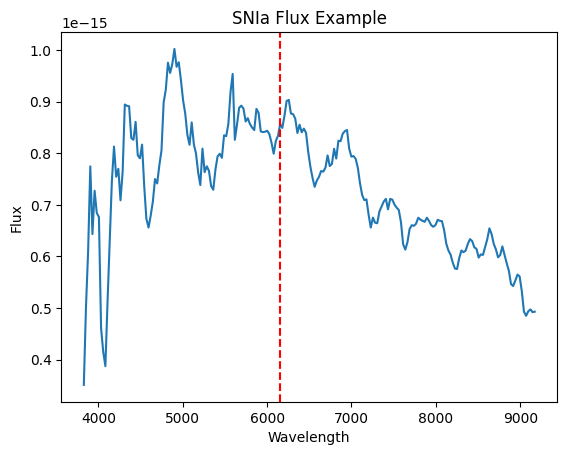

In [16]:
# Plot example spectra
silicon_line = 6150

plt.plot(ex_SNIa_wave[2:-2],ex_SNIa_flux[2:-2])
plt.axvline(x=silicon_line, color='r', linestyle='--')
plt.title('SNIa Flux Example')
plt.xlabel('Wavelength')
plt.ylabel('Flux')

In [17]:
ex_SNIa_wave.shape

(214,)

Text(0, 0.5, 'Flux')

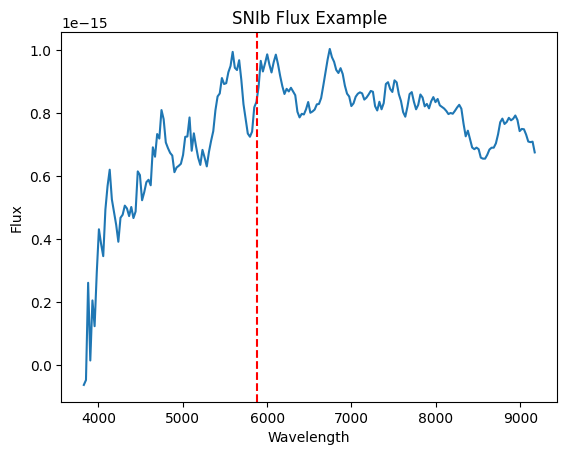

In [18]:
# Plot example spectra
helium_line = 5876
plt.plot(ex_SNIb_wave[2:-2],ex_SNIb_flux[2:-2])
plt.axvline(x=helium_line, color='r', linestyle='--')
plt.title('SNIb Flux Example')
plt.xlabel('Wavelength')
plt.ylabel('Flux')

In [19]:
df_merged.columns

Index(['ZTFID', 'IAUID', 'RA', 'Dec', 'peakt', 'peakfilt', 'peakmag',
       'peakabs', 'duration', 'rise', 'fade', 'type_x', 'redshift', 'b', 'A_V',
       'errors', 'followup_request_id', 'created_at', 'units', 'assignment_id',
       'modified', 'obj_id', 'altdata', 'observed_at', 'original_file_string',
       'origin', 'original_file_filename', 'type_y', 'owner_id', 'fluxes',
       'label', 'id', 'wavelengths', 'instrument_id', 'comments',
       'annotations', 'instrument_name', 'telescope_id', 'telescope_name',
       'groups', 'pis', 'reducers', 'observers', 'observed_at_mjd', 'owner',
       'obj_internal_key', 'external_reducer', 'external_observer',
       'external_pi', 'new_type'],
      dtype='object')

## Feature Extraction: Spectra

In [20]:
# Feature Extraction of Flux
# Extract peak flux value between wavelengths of 5500 and 6000

new_flux_col = np.zeros(len(df_merged))
new_wavelength_col = np.zeros(len(df_merged))

for i in range(len(df_merged)):

    wave = df_merged['wavelengths'].iloc[i]
    flux = df_merged['fluxes'].iloc[i]

    new_wave = np.fromstring(wave[2:-2], dtype=float, sep=',')
    new_flux = np.fromstring(flux[2:-2], dtype=float, sep=',')

    if len(new_wave)!=len(new_flux):
        new_flux_col[i] = np.nan
        continue
    
    # Find indices of wavelengths between 5500 and 6000
    indices = np.where((new_wave >= 5500) & (new_wave <= 6000))[0]  # Add [0] to access the array of indices

    if len(indices) == 0:
        new_flux_col[i] = np.nan
        continue
    
    # Filter flux values within the specified wavelength range
    flux_range = new_flux[indices]

    # Find the maximum flux value within the range
    max_flux = flux_range.max()

    new_flux_col[i] = max_flux
    

df_merged['helium_flux'] = new_flux_col

#'helium_flux' is new feature

/var/folders/nv/zss1vllj0ng4zcrk888wbjh80000gn/T/ipykernel_79148/3973587062.py:13: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  new_flux = np.fromstring(flux[2:-2], dtype=float, sep=',')


In [21]:
df_merged['new_type'].value_counts()

new_type
SN Ia    3082
other    1124
SN Ib     124
Name: count, dtype: int64

## Defining features and labels


In [22]:
df_binary = df_merged[(df_merged['new_type'] == 'SN Ia') | (df_merged['new_type'] == 'SN Ib')]

# Features for classification - we can change these around
# Currently not including the wavelength / flux, but we will see later

features = ['peakabs','duration','redshift','b','peakmag']
features2 = ['peakabs','duration','redshift','b','peakmag','helium_flux']


label = 'new_type'

features_label = ['peakabs','duration','redshift','b','peakmag','new_type','helium_flux']


new_data = df_binary[features_label]
new_data['peakabs'] = pd.to_numeric(new_data['peakabs'], errors='coerce')
new_data['duration'] = new_data['duration'].str.replace('>', '', regex=False)
new_data['redshift'] = pd.to_numeric(new_data['redshift'], errors='coerce')
new_data['b'] = pd.to_numeric(new_data['b'], errors='coerce')
#new_data['helium_flux'] = pd.to_numeric(new_data['helium_flux'], errors='coerce')

new_data = new_data.dropna()

X = new_data[features]
y = new_data[label]

X2 = new_data[features2]



/var/folders/nv/zss1vllj0ng4zcrk888wbjh80000gn/T/ipykernel_79148/811212763.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['peakabs'] = pd.to_numeric(new_data['peakabs'], errors='coerce')
/var/folders/nv/zss1vllj0ng4zcrk888wbjh80000gn/T/ipykernel_79148/811212763.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['duration'] = new_data['duration'].str.replace('>', '', regex=False)
/var/folders/nv/zss1vllj0ng4zcrk888wbjh80000gn/T/ipykernel_79148/811212763.py:18: SettingWithCopyWarning

In [23]:
X2

,peakabs,duration,redshift,b,peakmag,helium_flux
2,-19.41,34.229,0.06922,59.641962,18.0303,9.535000e-16
3,-18.91,8.87,0.07200,-50.332472,18.7979,3.206000e-16
7,-19.08,18.631,0.07141,52.363911,18.5663,5.245000e-16
14,-19.34,26.448,0.04077,50.277337,16.9207,8.839000e-16
20,-18.77,18.513,0.05295,31.693941,18.1923,1.163000e-15
...,...,...,...,...,...,...
5463,-17.72,0.02,0.03000,29.134727,17.9994,4.835880e-01
5468,-19.01,6.949,0.03713,38.055919,17.0986,5.983000e-16
5470,-19.35,4.427,0.02800,74.701205,16.1524,4.300000e-16
5474,-18.85,0.05,0.02309,58.194620,16.2495,5.086386e-01


## Check for Correlation and VIF

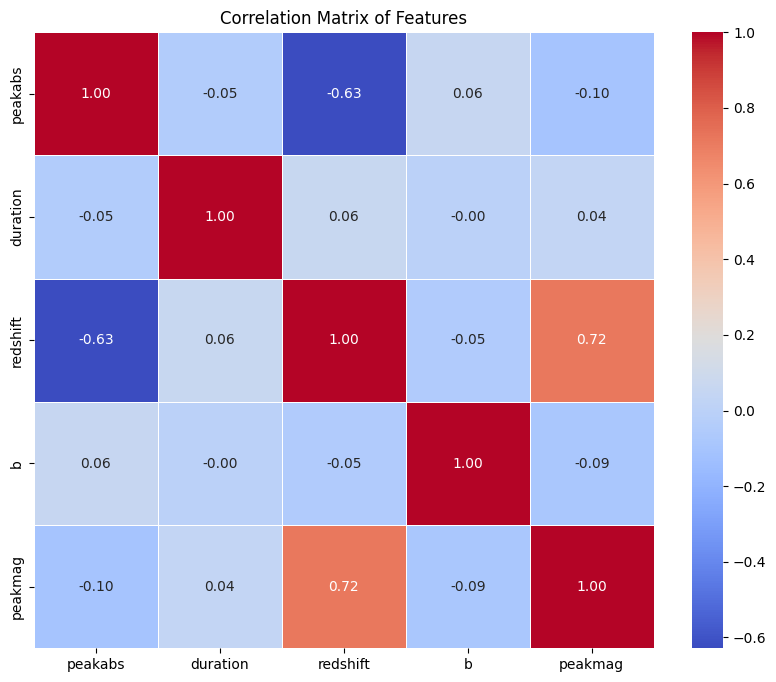

In [24]:
correlation_matrix = X.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_numeric = X.apply(pd.to_numeric, errors='coerce')

X_numeric = X_numeric.dropna()

vif_data = pd.DataFrame() 
vif_data["feature"] = X_numeric.columns 
vif_data["VIF"] = [variance_inflation_factor(X_numeric.values, i) for i in range(len(X_numeric.columns))] 

print("VIF Values:")
print(vif_data)

# maybe remove peakmag since VIF is high and it has high correlation with redshift

VIF Values:
    feature         VIF
0   peakabs  335.688194
1  duration    2.145666
2  redshift    8.480223
3         b    1.109361
4   peakmag  350.133697


## Oversampling 

In [26]:
import imblearn
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')

In [27]:
X_over, y_over = oversample.fit_resample(X, y)

In [28]:
# Oversampled data now has equal counts of Ia and Ib
y_over.value_counts()

new_type
SN Ia    3067
SN Ib    3067
Name: count, dtype: int64

## SVM

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Step 1: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

# Step 2: Initialize and train SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42, probability=True)  # You can choose different kernels based on your data
svm_classifier.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = svm_classifier.predict(X_test)

# Step 4: Evaluate model performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       SN Ia       0.86      0.93      0.89       627
       SN Ib       0.92      0.84      0.87       600

    accuracy                           0.88      1227
   macro avg       0.89      0.88      0.88      1227
weighted avg       0.89      0.88      0.88      1227



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Area under ROC curve (AUC): 0.8751


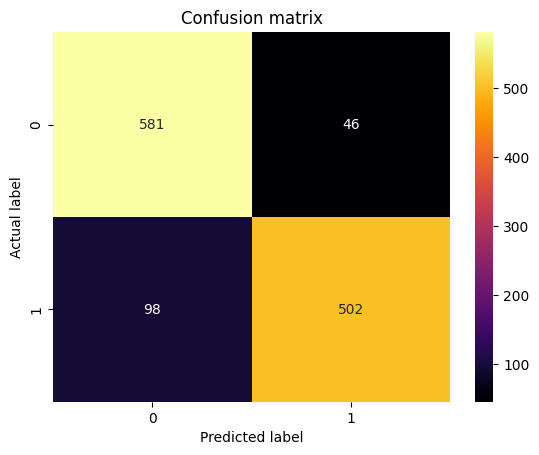

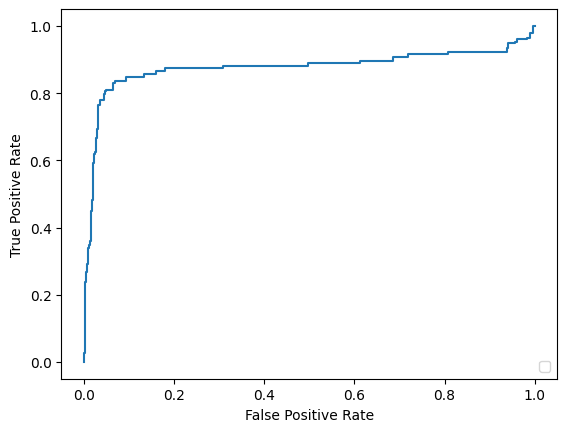

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, RocCurveDisplay, auc

cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="inferno" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

y_prob = svm_classifier.predict_proba(X_test)
y_prob = y_prob[:, 1]
fpr, tpr, other = roc_curve(y_test, y_prob, pos_label = 'SN Ib')

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

roc_auc = auc(fpr, tpr)
print("Area under ROC curve (AUC): {:.4f}".format(roc_auc))

 Using just 'peakabs', 'peakmag', 'duration', 'redshift', 'b' as features, we have okay classification abilities. Let's see how this improved when we add in the spectra information

In [32]:
# Adding Helium Line info as a feature

X2_over, y2_over = oversample.fit_resample(X2, y)

# Step 1: Split data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_over, y2_over, test_size=0.2, random_state=42)

# Step 2: Initialize and train SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42, probability=True)  # You can choose different kernels based on your data
svm_classifier.fit(X2_train, y2_train)

# Step 3: Make predictions
y_pred = svm_classifier.predict(X2_test)

# Step 4: Evaluate model performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       SN Ia       0.86      0.93      0.89       627
       SN Ib       0.92      0.84      0.88       600

    accuracy                           0.89      1227
   macro avg       0.89      0.89      0.89      1227
weighted avg       0.89      0.89      0.89      1227



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Area under ROC curve (AUC): 0.8687


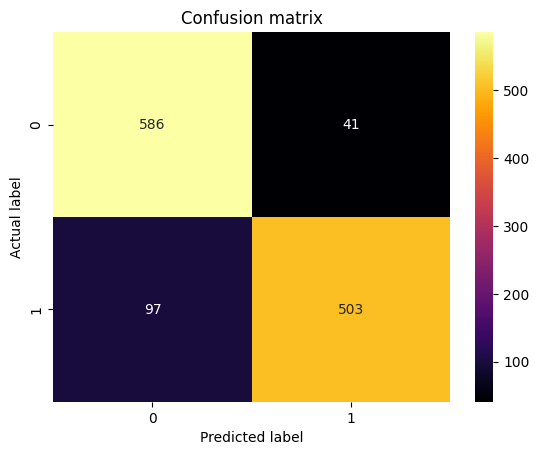

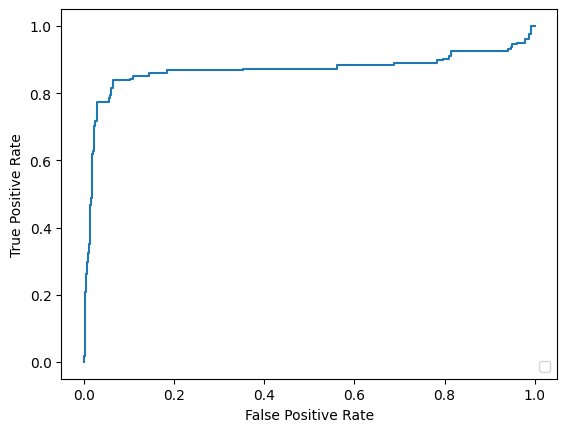

In [33]:
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="inferno" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

y_prob = svm_classifier.predict_proba(X2_test)
y_prob = y_prob[:, 1]
fpr, tpr, other = roc_curve(y_test, y_prob, pos_label = 'SN Ib')

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

roc_auc = auc(fpr, tpr)
print("Area under ROC curve (AUC): {:.4f}".format(roc_auc))

In [34]:
# Adding remaining SN as other
# Drop rows with missing values

from imblearn.over_sampling import RandomOverSampler

#df_binary = df_merged[(df_merged['new_type'] == 'SN Ia') | (df_merged['new_type'] == 'SN Ib')]

# Features for classification - we can change these around
# Currently not including the wavelength / flux, but we will see later

features = ['peakabs','duration','redshift','b','peakmag']
features2 = ['peakabs','duration','redshift','b','peakmag','helium_flux']

label = 'new_type'

features_label = ['peakabs','duration','redshift','b','peakmag','new_type','helium_flux']

new_data = df_merged[features_label]

new_data['peakabs'] = pd.to_numeric(new_data['peakabs'], errors='coerce')
new_data['duration'] = new_data['duration'].str.replace('>', '', regex=False)
new_data['redshift'] = pd.to_numeric(new_data['redshift'], errors='coerce')
new_data['b'] = pd.to_numeric(new_data['b'], errors='coerce')
#new_data['helium_flux'] = pd.to_numeric(new_data['helium_flux'], errors='coerce')

new_data = new_data.dropna()

X = new_data[features]
y = new_data[label]

X2 = new_data[features2]

new_data = new_data.dropna()

# separating out SN Ia and SN Ib and labeling the others as "other"
#new_data.loc[~new_data['new_type'].isin(['SN Ia', 'SN Ib']), 'new_type'] = 'other'

sampling_strategy = {'SN Ib': 3000, 'other': 3000}

oversample = RandomOverSampler(sampling_strategy=sampling_strategy)

X2_over, y2_over = oversample.fit_resample(X2, y)

y2_over.value_counts()

/var/folders/nv/zss1vllj0ng4zcrk888wbjh80000gn/T/ipykernel_79148/3202006314.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['peakabs'] = pd.to_numeric(new_data['peakabs'], errors='coerce')
/var/folders/nv/zss1vllj0ng4zcrk888wbjh80000gn/T/ipykernel_79148/3202006314.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['duration'] = new_data['duration'].str.replace('>', '', regex=False)
/var/folders/nv/zss1vllj0ng4zcrk888wbjh80000gn/T/ipykernel_79148/3202006314.py:22: SettingWithCopyWarn

new_type
SN Ia    3067
other    3000
SN Ib    3000
Name: count, dtype: int64

In [35]:

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

X2_train, X2_test, y_train, y_test = train_test_split(X2_over, y2_over, test_size=0.2, random_state=42)

# Create SVM classifier
svm_classifier = SVC(kernel='linear', decision_function_shape='ovr', probability=True)  # Use 'ovr' for One-vs-Rest

# Train the classifier
svm_classifier.fit(X2_train, y_train)

# Predict the labels for test set
y_pred = svm_classifier.predict(X2_test)
y_prob = svm_classifier.predict_proba(X2_test)
y_prob = y_prob[:, 1]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.7166482910694597
Classification Report:
               precision    recall  f1-score   support

       SN Ia       0.74      0.92      0.82       630
       SN Ib       0.66      0.75      0.70       615
       other       0.80      0.45      0.57       569

    accuracy                           0.72      1814
   macro avg       0.73      0.71      0.70      1814
weighted avg       0.73      0.72      0.70      1814



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Area under ROC curve (AUC): 0.7897


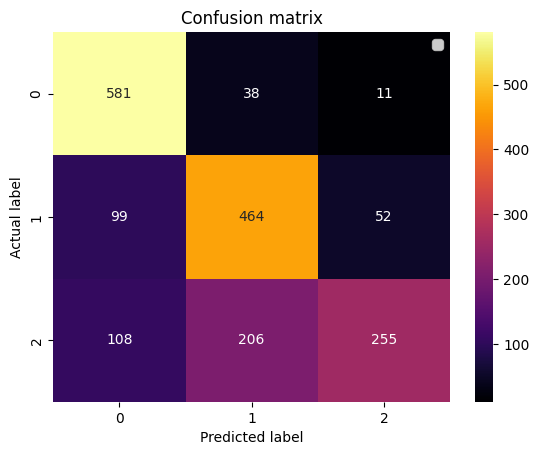

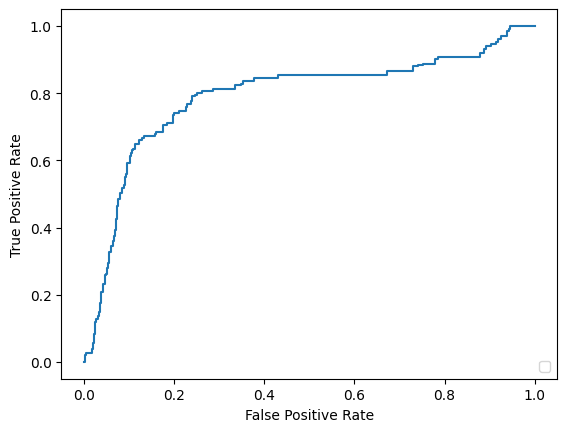

In [36]:
cf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="inferno" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.legend()

fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label = 'SN Ib')

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

roc_auc = auc(fpr, tpr)
print("Area under ROC curve (AUC): {:.4f}".format(roc_auc))

## Logistic Regression

This is for SN Ia vs. SN Ib

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cross-Validation Scores: [0.88594705 0.84928717 0.87169043 0.85947047 0.86965377 0.84317719
 0.88594705 0.86122449 0.84081633 0.86530612]
Area under ROC curve (AUC): 0.8718


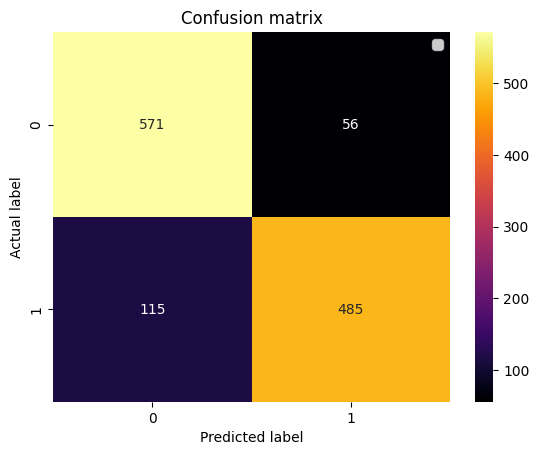

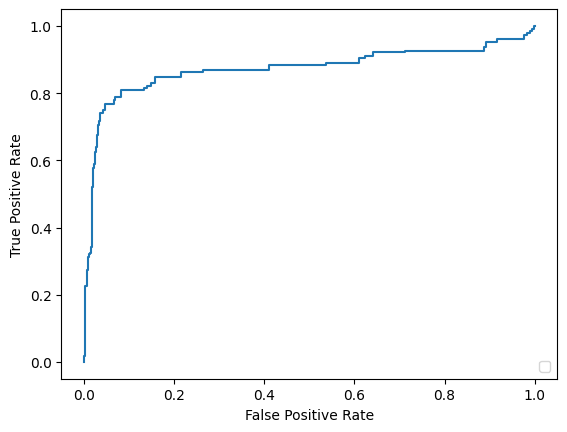

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, RocCurveDisplay, auc
from sklearn.model_selection import cross_val_score

# using the same split that Abby used above
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)
y_prob = y_prob[:, 1]

cf_matrix = confusion_matrix(y_test, y_pred)

cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)

sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="inferno" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.legend()

# not recognizing my pos_label argument idk why
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label = 'SN Ib')

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

roc_auc = auc(fpr, tpr)
print("Area under ROC curve (AUC): {:.4f}".format(roc_auc))

Simple Logistic regreesion with CV = 10 (this didn't change anything)



## Multinomial Logistic

In [35]:
# data preprocessing 

df_multinomial = df_merged.copy()

features = ['peakabs', 'duration', 'redshift', 'b'] # removed peakmag here but honestly didn't change much
label = 'new_type'

# Define features and label columns
features_label = ['peakabs', 'duration', 'redshift', 'b', 'peakmag', 'new_type']

# Extract relevant data
new_data = df_multinomial[features_label].copy()

# Preprocess data
new_data['peakabs'] = pd.to_numeric(new_data['peakabs'], errors='coerce')
new_data['duration'] = new_data['duration'].str.replace('>', '', regex=False)
new_data['redshift'] = pd.to_numeric(new_data['redshift'], errors='coerce')
new_data['b'] = pd.to_numeric(new_data['b'], errors='coerce')

# Drop rows with missing values
new_data = new_data.dropna()

# separating out SN Ia and SN Ib and labeling the others as "other"
new_data.loc[~new_data['new_type'].isin(['SN Ia', 'SN Ib']), 'new_type'] = 'other'

X2 = new_data[features]
y2 = new_data[label]

In [36]:
y.value_counts()

new_type
SN Ia    3079
other    1112
SN Ib     122
Name: count, dtype: int64

In [37]:
# oversample
from imblearn.over_sampling import RandomOverSampler

sampling_strategy = {'SN Ib': 3000, 'other': 3000}

oversample = RandomOverSampler(sampling_strategy=sampling_strategy)

X2_over, y2_over = oversample.fit_resample(X2, y2)

y_over.value_counts()

new_type
SN Ia    3079
other    3000
SN Ib    3000
Name: count, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cross-Validation Scores: [0.69188446 0.69325997 0.67400275 0.70110193 0.70523416 0.69559229
 0.70110193 0.67217631 0.70523416 0.68595041]
Area under ROC curve (AUC): 0.7509


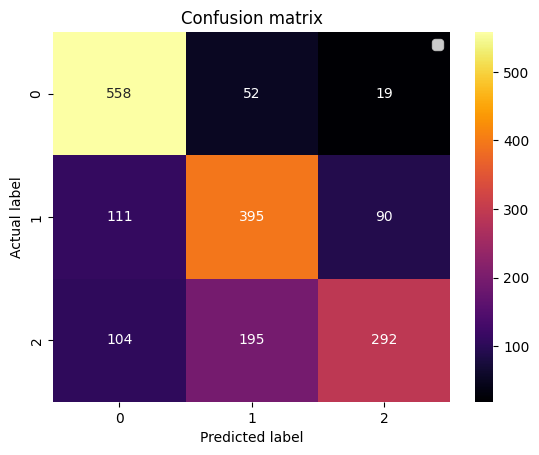

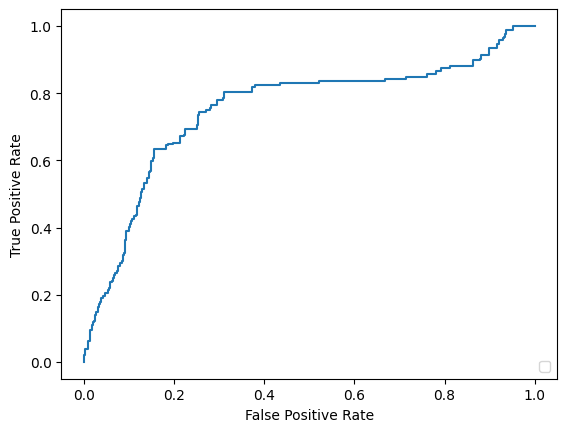

In [38]:
from sklearn.model_selection import cross_val_score

# Step 1: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2_over, y2_over, test_size=0.2, random_state=42)

model = LogisticRegression(multi_class='multinomial', solver = 'lbfgs', max_iter=10000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)
y_prob = y_prob[:, 1]

cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)

cf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="inferno" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.legend()

# not recognizing my pos_label argument idk why
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label = 'SN Ib')

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

roc_auc = auc(fpr, tpr)
print("Area under ROC curve (AUC): {:.4f}".format(roc_auc))

### Adding in the Helium Flux feature

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Cross-Validation Scores: [0.6707989  0.70247934 0.67630854 0.67172414 0.71034483 0.68827586
 0.63448276 0.71034483 0.66344828 0.68689655]
Area under ROC curve (AUC): 0.7951


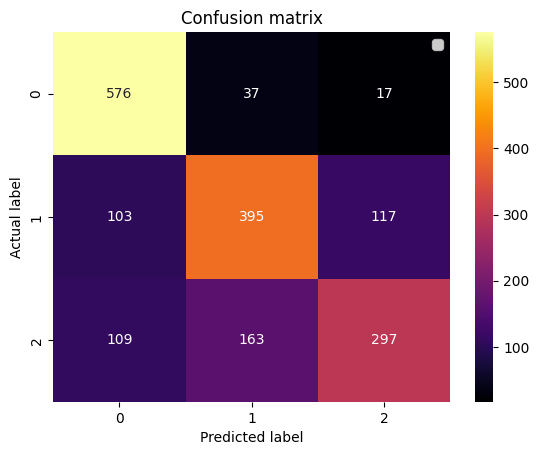

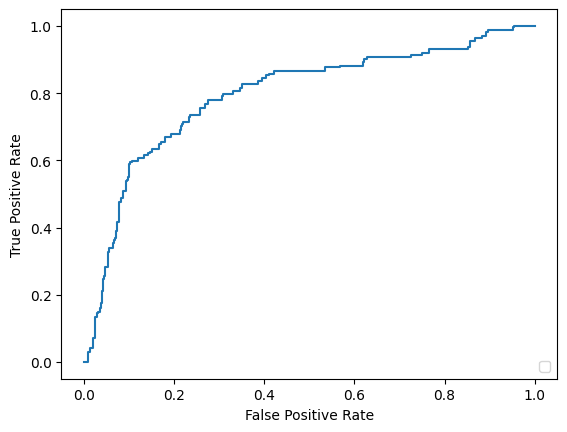

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, RocCurveDisplay, auc
from sklearn.model_selection import cross_val_score

# adding in the spectra info

# using the same split that Abby used above
model = LogisticRegression()
model.fit(X2_train, y_train)

y_pred = model.predict(X2_test)
y_prob = model.predict_proba(X2_test)
y_prob = y_prob[:, 1]

cf_matrix = confusion_matrix(y_test, y_pred)

cv_scores = cross_val_score(model, X2_train, y_train, cv=10, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)

sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="inferno" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.legend()

# not recognizing my pos_label argument idk why
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label = 'SN Ib')

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

roc_auc = auc(fpr, tpr)
print("Area under ROC curve (AUC): {:.4f}".format(roc_auc))

In [40]:
# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

       SN Ia       0.72      0.89      0.80       629
       SN Ib       0.62      0.66      0.64       596
       other       0.73      0.49      0.59       591

    accuracy                           0.69      1816
   macro avg       0.69      0.68      0.67      1816
weighted avg       0.69      0.69      0.68      1816



In [91]:
# now with multinomial info 
# Adding remaining SN as other
# Drop rows with missing values

from imblearn.over_sampling import RandomOverSampler

# Features for classification - we can change these around
# Currently not including the wavelength / flux, but we will see later

features2 = ['peakabs','duration','redshift','b','peakmag','helium_flux']

label = 'new_type'

features_label = ['peakabs','duration','redshift','b','peakmag','new_type','helium_flux']

new_data = df_merged[features_label].copy()

new_data['peakabs'] = pd.to_numeric(new_data['peakabs'], errors='coerce')
new_data['duration'] = new_data['duration'].str.replace('>', '', regex=False)
new_data['redshift'] = pd.to_numeric(new_data['redshift'], errors='coerce')
new_data['b'] = pd.to_numeric(new_data['b'], errors='coerce')
new_data['helium_flux'] = pd.to_numeric(new_data['helium_flux'], errors='coerce')

new_data = new_data.dropna()

y = new_data[label]

X2 = new_data[features2]

new_data = new_data.dropna()

# separating out SN Ia and SN Ib and labeling the others as "other"
new_data.loc[~new_data['new_type'].isin(['SN Ia', 'SN Ib']), 'new_type'] = 'other'

sampling_strategy = {'SN Ib': 3000, 'other': 3000}

oversample = RandomOverSampler(sampling_strategy=sampling_strategy)

X2_over, y_over = oversample.fit_resample(X2, y)

y_over.value_counts()


new_type
SN Ia    3067
other    3000
SN Ib    3000
Name: count, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cross-Validation Scores: [0.68595041 0.69283747 0.68870523 0.69655172 0.67310345 0.69655172
 0.6537931  0.69793103 0.70344828 0.69655172]
Area under ROC curve (AUC): 0.7718


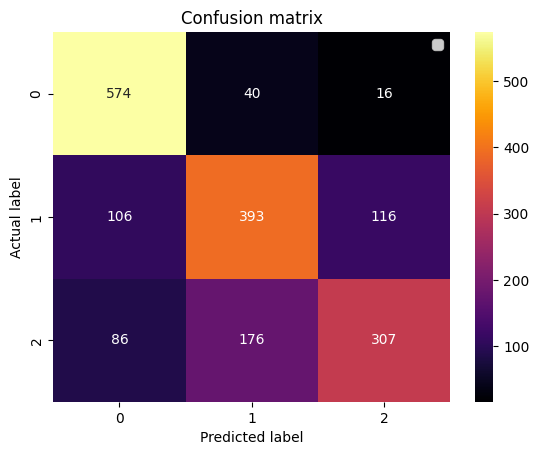

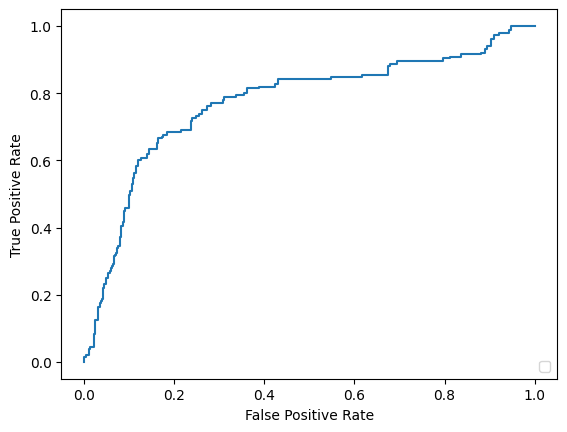

In [92]:
from sklearn.model_selection import cross_val_score

# Step 1: Split data into training and testing sets
X2_train, X2_test, y_train, y_test = train_test_split(X2_over, y_over, test_size=0.2, random_state=42)

model = LogisticRegression(multi_class='multinomial', solver = 'lbfgs', max_iter=10000)

model.fit(X2_train, y_train)

y_pred = model.predict(X2_test)
y_prob = model.predict_proba(X2_test)
y_prob = y_prob[:, 1]

cv_scores = cross_val_score(model, X2_train, y_train, cv=10, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)

cf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="inferno" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.legend()

# not recognizing my pos_label argument idk why
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label = 'SN Ib')

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

roc_auc = auc(fpr, tpr)
print("Area under ROC curve (AUC): {:.4f}".format(roc_auc))

In [93]:
# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

       SN Ia       0.75      0.91      0.82       630
       SN Ib       0.65      0.64      0.64       615
       other       0.70      0.54      0.61       569

    accuracy                           0.70      1814
   macro avg       0.70      0.70      0.69      1814
weighted avg       0.70      0.70      0.69      1814



## Random Forest


In [39]:
from sklearn.ensemble import RandomForestClassifier
X2_over, y_over = oversample.fit_resample(X2, y)
# Step 1: Split data into training and testing sets
X2_train, X2_test, y_train, y_test = train_test_split(X2_over, y_over, test_size=0.2, random_state=42)

# Step 2: Initialize and train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X2_train, y_train)

# Step 3: Make predictions
y_pred = rf_classifier.predict(X2_test)

# Step 4: Evaluate model performance
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

       SN Ia       0.98      0.95      0.96       630
       SN Ib       1.00      1.00      1.00       615
       other       0.95      0.98      0.96       569

    accuracy                           0.97      1814
   macro avg       0.97      0.97      0.97      1814
weighted avg       0.97      0.97      0.97      1814



In [40]:
from sklearn.ensemble import RandomForestClassifier
X_over, y_over = oversample.fit_resample(X, y)
# Step 1: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

# Step 2: Initialize and train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = rf_classifier.predict(X_test)

# Step 4: Evaluate model performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       SN Ia       0.99      0.95      0.97       630
       SN Ib       0.99      1.00      0.99       615
       other       0.95      0.98      0.96       569

    accuracy                           0.98      1814
   macro avg       0.98      0.98      0.98      1814
weighted avg       0.98      0.98      0.98      1814



In [41]:
from sklearn.model_selection import GridSearchCV

# Define the range of values for the number of estimators
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250]
}

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform grid search using 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X2_train, y_train)

# Get the best estimator and its parameters
best_rf_classifier = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Parameters:", best_params)

# Step 3: Make predictions using the best estimator
y_pred = best_rf_classifier.predict(X2_test)

# Step 4: Evaluate model performance
print("Classification Report:")
print(classification_report(y_test, y_pred))


Best Parameters: {'n_estimators': 100}
Classification Report:
              precision    recall  f1-score   support

       SN Ia       0.98      0.95      0.96       630
       SN Ib       1.00      1.00      1.00       615
       other       0.95      0.98      0.96       569

    accuracy                           0.97      1814
   macro avg       0.97      0.97      0.97      1814
weighted avg       0.97      0.97      0.97      1814



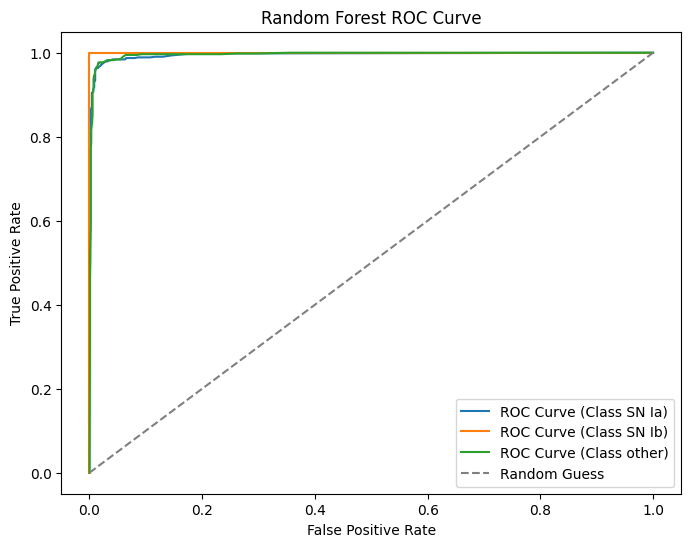

NameError: name 'roc_auc_score' is not defined

In [42]:
y_pred_proba = best_rf_classifier.predict_proba(X2_test)

# ROC Curve
plt.figure(figsize=(8, 6))
for i in range(len(best_rf_classifier.classes_)):
    fpr, tpr, _ = roc_curve(y_test == best_rf_classifier.classes_[i], y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f'ROC Curve (Class {best_rf_classifier.classes_[i]})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend()
plt.show()


# Compute AUC score for each class
auc_scores = {}
for i in range(len(best_rf_classifier.classes_)):
    auc_scores[best_rf_classifier.classes_[i]] = roc_auc_score((y_test == best_rf_classifier.classes_[i]), y_pred_proba[:, i])

# Print AUC score for each class
for class_label, auc_score in auc_scores.items():
    print(f"AUC Score for Class {class_label}: {auc_score:.4f}")

# Compute macro-average AUC score
macro_avg_auc = sum(auc_scores.values()) / len(auc_scores)
print(f"\nMacro-average AUC Score: {macro_avg_auc:.4f}")

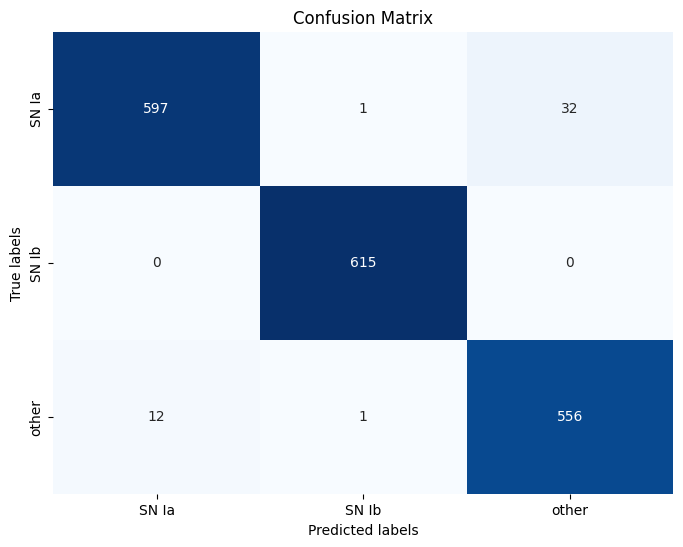

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=best_rf_classifier.classes_, yticklabels=best_rf_classifier.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [45]:
importances = list(best_rf_classifier.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
for pair in feature_importances:
    print('Variable: {:20} Importance: {}'.format(*pair))

Variable: peakabs              Importance: 0.3
Variable: duration             Importance: 0.27
Variable: redshift             Importance: 0.18
Variable: peakmag              Importance: 0.12
Variable: b                    Importance: 0.11


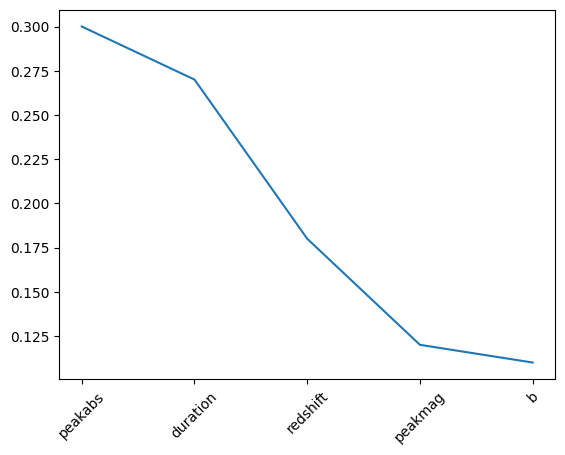

In [46]:
x_axis_text, y = zip(*feature_importances)
x = np.arange(len(y))
plt.xticks(x, x_axis_text, rotation=45)
plt.plot(x, y)
plt.show()